# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import pylab as plt

import seaborn as sns  

from scipy.stats import norm
from scipy.stats import t

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
sumdf=salaries.describe(exclude=["object", "category"]).T

print("Percentage of NAs in float columns:")
((len(salaries)-sumdf["count"])*100)/len(salaries)

Percentage of NAs in float columns:


Typical Hours    75.824971
Annual Salary    24.175029
Hourly Rate      75.824971
Name: count, dtype: float64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
display(sumdf["count"][:2])
sumdf["count"][1]+sumdf["count"][2] == len(salaries)

Typical Hours     8022.0
Annual Salary    25161.0
Name: count, dtype: float64

True

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
departm_df=salaries.groupby("Department").count().head()

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the **hourly wage of all hourly workers** is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

#### According to what the exercice asks: 

I will apply One-sample, Two-sided t-test 

* Ho: wage hourly workers == 30
* Ha: wage hourly workers != 30

P.val thresh < 0.05 (95% confidence)


By default, numpy.std returns the population standard deviation, <br/>
in which case np.std([0,1]) is correctly reported to be 0.5. <br/>
If you are looking for the sample standard deviation, <br/>
you can supply an optional ddof parameter to std() <br/>


In [18]:
hourly_workers=salaries[salaries["Salary or Hourly"]=="Hourly"]
hourly_workers.head()
#hourly_workers.describe()["Hourly Rate"][2]
display(np.std(hourly_workers["Hourly Rate"],ddof=1),np.std(hourly_workers["Hourly Rate"]),hourly_workers.describe()["Hourly Rate"][2])

12.11257268427681

12.111817701093837

12.11257268427681

In [19]:
mu = 30       # media poblacional
mu_hat = hourly_workers["Hourly Rate"].mean()    # media muestral, media del experimento
std_hat = np.std(hourly_workers["Hourly Rate"],ddof=1)  # std muestral, std del experimento
n = len(hourly_workers)         # tamaño de la muestr
                 
Ho= "wage hourly workers == 30"
Ha= "wage hourly workers != 30"

print(mu, mu_hat, std_hat, n)

30 32.78855771628128 12.11257268427681 8022


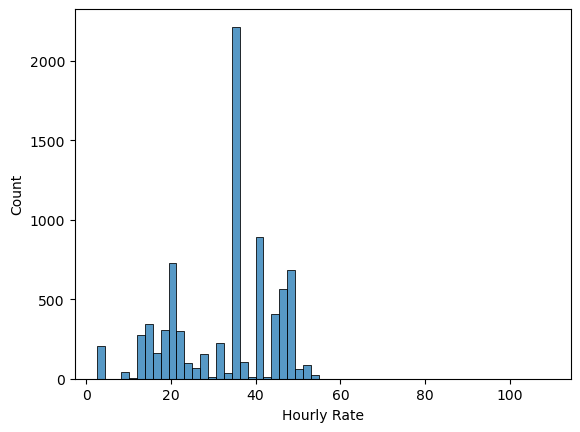

In [20]:
sns.histplot(hourly_workers["Hourly Rate"]);
#from scipy.stats import shapiro
#shapiro(hourly_workers["Hourly Rate"])  # es normal, NO puedo rechazar H0

In [21]:
from scipy.stats import ttest_1samp  # testeo de una muestra frente a poblacion
t_test = ttest_1samp(hourly_workers["Hourly Rate"], 30, alternative='two-sided')

In [22]:
if (t_test.pvalue < 0.05):
    print(f'{t_test.pvalue}, We reject the Ho thus, {Ha}')
else:
    print(f'{t_test.pvalue}, We cannot reject Ho i.e., {Ho}')

4.3230240486229894e-92, We reject the Ho thus, wage hourly workers != 30


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that **salaries this year are higher than last year's mean of $86000/year a year for all salaried** employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

#### According to what the exercice asks: 

I will apply One-sample, One-sided t-test (less)

* Ho: year salary of salaried workers >= 86,000
* Ha: year salary of salaried workers < 86,000

P.val thresh < 0.05 (95% confidence)



In [26]:
police=salaries[(salaries.Department =="POLICE") | (salaries.Department =="POLICE BOARD")]
police

police[police["Salary or Hourly"]=="Salary"]
police=police[police["Salary or Hourly"]=="Salary"]

police

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN
...,...,...,...,...,...,...,...,...
33177,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


Using the `crosstab` function, find the department that has the most hourly workers. 

In [27]:
mu = 86_000       # media poblacional
mu_hat = police["Annual Salary"].mean()    # media muestral, media del experimento
std_hat = np.std(police["Annual Salary"],ddof=1)  # std muestral, std del experimento
n = len(police)         # tamaño de la muestr

Ho= "year salary of salaried workers >= 86,000"
Ha= "year salary of salaried workers < 86,000" # less

print(mu, mu_hat, std_hat, n)


86000 86486.36222586902 18272.44306756898 13406


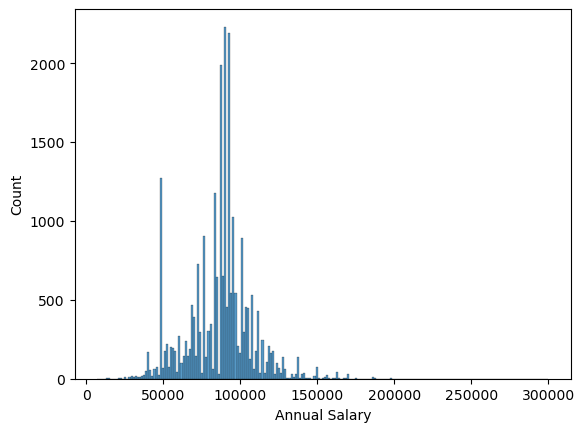

In [28]:
sns.histplot(salaried_workers["Annual Salary"]);
#from scipy.stats import shapiro
#shapiro(salaried_workers["Annual Salary"])  # es normal, NO puedo rechazar H0

In [29]:
from scipy.stats import ttest_1samp  # testeo de una muestra frente a poblacion
t_test = ttest_1samp(police["Annual Salary"], 86000, alternative='less')

In [30]:
if (t_test.pvalue < 0.05):
    print(f'{t_test.pvalue}, We reject the Ho thus, {Ha}')
else:
    print(f'{t_test.pvalue}, We cannot reject Ho i.e., {Ho}')

0.9989693542994336, We cannot reject Ho i.e., year salary of salaried workers >= 86,000


The workers from the department with the **most hourly workers** have complained that their **hourly wage is less than $35/hour**. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [33]:
sal_dep_df=salaries.pivot_table(columns=("Department"), index=("Salary or Hourly"), aggfunc="count").T
sal_dep_df2=pd.DataFrame(sal_dep_df["Hourly"].sort_values(ascending=False))
sal_dep_df2

Hourly
                  Department               
Hourly Rate       STREETS & SAN      1862.0
Typical Hours     STREETS & SAN      1862.0
Full or Part-Time STREETS & SAN      1862.0
Job Titles        STREETS & SAN      1862.0
Name              STREETS & SAN      1862.0
...                                     ...
Typical Hours     HUMAN RELATIONS       NaN
                  INSPECTOR GEN         NaN
                  LICENSE APPL COMM     NaN
                  POLICE BOARD          NaN
                  TREASURER             NaN

[210 rows x 1 columns]

In [35]:
dep_workers=salaries[salaries["Department"]=="STREETS & SAN"]
dep_workers

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
21,"ABDUL-SHAKUR, TAHIR",GENERAL LABORER - DSS,STREETS & SAN,F,Hourly,40.0,NaN,21.43
24,"ABERCROMBIE, TIMOTHY",MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
36,"ABRAMS, DANIELLE T",SANITATION LABORER,STREETS & SAN,F,Hourly,40.0,NaN,36.21
39,"ABRAMS, SAMUEL A",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
...,...,...,...,...,...,...,...,...
33107,"ZIZUMBO, LUIS",MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
33147,"ZUMMO, ROBERT J",MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
33149,"ZUNICH, JONATHAN G",SANITATION LABORER,STREETS & SAN,F,Hourly,40.0,NaN,36.21
33156,"ZUNIGA, THOMAS",GENERAL LABORER - DSS,STREETS & SAN,F,Hourly,40.0,NaN,22.12


In [36]:
mu = 35   # media poblacional
mu_hat = dep_workers["Hourly Rate"][~dep_workers["Hourly Rate"].isna()].mean()    # media muestral, media del experimento
std_hat = np.std(dep_workers["Hourly Rate"][~dep_workers["Hourly Rate"].isna()],ddof=1)  # std muestral, std del experimento
n = len(dep_workers["Hourly Rate"][~dep_workers["Hourly Rate"].isna()])         # tamaño de la muestr

Ho= "hourly salary of STREETS & SAN workers > 35" 
Ha= "hourly salary of STREETS & SAN workers <= 35" # less

print(mu, mu_hat, std_hat, n)


35 33.728378088076845 5.735241841459193 1862


In [37]:
from scipy.stats import ttest_1samp  # testeo de una muestra frente a poblacion
t_test = ttest_1samp(dep_workers["Hourly Rate"][~dep_workers["Hourly Rate"].isna()], 35, alternative='less')

In [38]:
if (t_test.pvalue < 0.05):
    print(f'{t_test.pvalue}, We reject the Ho thus, {Ha}')
else:
    print(f'{t_test.pvalue}, We cannot reject Ho i.e., {Ho}')

1.6689265282353859e-21, We reject the Ho thus, hourly salary of STREETS & SAN workers <= 35


# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [40]:
hourly_sal=salaries[salaries["Salary or Hourly"]=="Hourly"]["Hourly Rate"]

In [41]:
from scipy.stats import sem   # error standard

err_std=sem(hourly_sal)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [43]:
t.interval(0.95,                 # alfa = 1 - pvalor, confianza
           len(hourly_sal)-1,     #  N-1, dof
           loc=hourly_sal.mean(),
           scale=err_std
           )


(32.52345834488529, 33.05365708767727)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the **number of hourly workers** in the City of Chicago is significantly different **from 25% at the 95% confidence level.**

In [171]:
from statsmodels.stats.proportion import proportions_ztest

In [180]:
# ¿la proporcion de a es distinta del 50%?

salaried_workers=salaries[salaries["Salary or Hourly"]=="Salary"]
hourly_workers=salaries[salaries["Salary or Hourly"]=="Hourly"]

total=len(salaried_workers)+len(hourly_workers)
hourly_perc= (len(hourly_workers)*100)/total

print(total, hourly_perc, len(hourly_workers), len(salaried_workers))

33183 24.17502938251514 8022 25161


In [183]:
# H0 : es igual
# H1 : es distinta la proporcion

zprop= proportions_ztest(len(hourly_workers), # the number of successes in nobs trials.
                                    total,  # numero total de elementos
                                    0.25           # proporcion
                                   ) 



if (t_test.pvalue < 0.05):
    print(f'{zprop[1]}, We reject the Ho thus, NOT EQUAL 25%')
else:
    print(f'{zprop[1]}, We cannot reject Ho')

0.0004481127249057967, We cannot reject Ho
